## Visualization in Python, Seaborn

Seaborn, a data visualization package, is introduced in this notebook. We begin with the pandas package as a means to read and prepare the data to be visualized.

### Reading and manipulating data via Python Pandas

Pandas is a Python package created for managing data in preparation for data analysis. The pandas name is derived from the term 'panel data' econometricians use to describe cross-section time series data. The package is included in the Jupyter install, we simply need to load it with the import command.

In [2]:
import pandas as pd # convention is to include pd 'alias' for reference purposes 
import numpy as np

In [3]:
pwd # displays working directory

'C:\\Users\\shrey'

In [4]:
undata_df = pd.read_excel("UNData3.xlsx") 

In [5]:
undata_df.head()

,COUNTRY,HDI,LifeExp,Edu,GNI_PC,HDI_NI,CONTINENT
0,Algeria,0.713,73.4,7.6,7418,0.755,Africa
1,Central African Republic,0.352,49.1,3.5,722,0.386,Africa
2,Chad,0.340,49.9,1.5,1258,0.324,Africa
3,Congo,0.534,57.8,5.9,2934,0.553,Africa
4,Congo (Democratic Republic of the),0.304,48.7,3.5,319,0.404,Africa


In [6]:
undata_df.shape # display rows and columns

(93, 7)

In [7]:
undata_df.dtypes

COUNTRY       object
HDI          float64
LifeExp      float64
Edu          float64
GNI_PC         int64
HDI_NI       float64
CONTINENT     object
dtype: object

In [8]:
undata_df.CONTINENT = undata_df.CONTINENT.astype('category')

In [9]:
undata_df.dtypes

COUNTRY        object
HDI           float64
LifeExp       float64
Edu           float64
GNI_PC          int64
HDI_NI        float64
CONTINENT    category
dtype: object

### matplotlib

In [10]:
import matplotlib.pyplot as plt

We create a colors vector matching the panda rows below

In [11]:
colormap = {'Africa': 'red', 'Asia': 'green', 'Europe': 'blue', 'Australia': 'orange', 'NorthAmerica': 'yellow', 'SouthAmerica': 'purple'}
colors = [colormap[x] for x in undata_df['CONTINENT']]

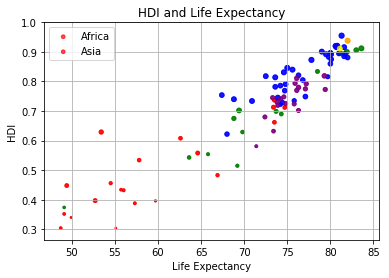

In [19]:
plt.scatter(undata_df.LifeExp, undata_df.HDI, color=colors, s=undata_df.Edu*2, alpha=0.7) 
plt.xlabel('Life Expectancy')
plt.ylabel('HDI')
plt.title('HDI and Life Expectancy')
plt.legend(colormap, loc=2)
plt.grid(True)
plt.show()

### Bokeh

In [20]:
from bokeh.io import push_notebook, show, output_notebook
from bokeh.plotting import figure
output_notebook()

Loading BokehJS ...

In [21]:
p = figure(title = 'Life Expectancy and HDI')
p.xaxis.axis_label = 'Life Expectancy'
p.yaxis.axis_label = 'HDI'
p.circle(x=undata_df["LifeExp"], y=undata_df["HDI"], color=colors, fill_alpha=0.2, size=10)
show(p, notebook_handle=True)

### Seaborn

Seaborn is a Python module that leverages the matplotlib package. As ggplot (in R) is attributable to Hadley Wickham, Seaborn is attributable to Michael Waskom. The package is included in the Anaconda install; you can also download it using the command: conda install -c anaconda seaborn=0.7.1

See http://seaborn.pydata.org/introduction.html for more information.

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns 

The lmplot command produces a scatterplot and imposes a regression line (with confidence interval); in the following case, using the gross national income per capita (GNI_PC) and life expectancy. Details about the command can be found at 
http://seaborn.pydata.org/

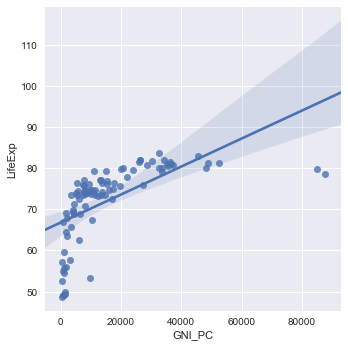

In [16]:
sns.lmplot(x='GNI_PC', y='LifeExp', data=undata_df)

The lmplot command provides a series of optional parameters, such as a parameter to change the line fit (e.g., lowess) or removing the fitted line altogether, as shown in the next two commands.

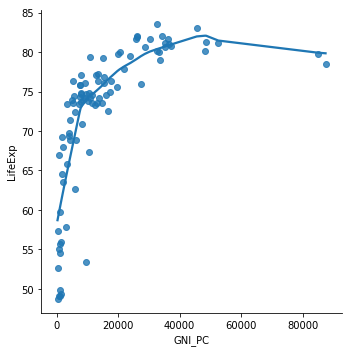

In [16]:
sns.lmplot('GNI_PC', 'LifeExp', data=undata_df, lowess=True)

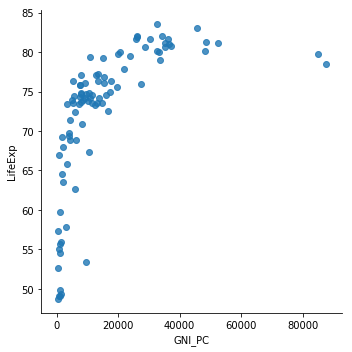

In [17]:
sns.lmplot('GNI_PC', 'LifeExp', data=undata_df, fit_reg=False)

We will create a new data frame containing the values we wish to use for a bar plot.

In [18]:
continent_count = undata_df.CONTINENT.value_counts()
new_df = pd.DataFrame({'count':continent_count})
names = new_df.index
new_df = pd.DataFrame({'count':continent_count, 'names':names})
new_df

,count,names
Europe,38,Europe
Africa,20,Africa
SouthAmerica,19,SouthAmerica
Asia,14,Asia
NorthAmerica,1,NorthAmerica
Australia,1,Australia


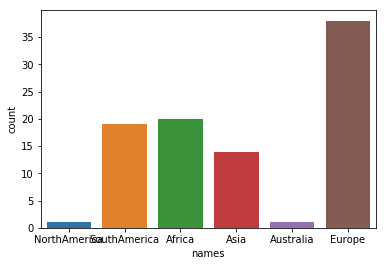

In [19]:
g = sns.barplot(x="names", y="count", 
            order=["NorthAmerica", "SouthAmerica", "Africa", "Asia", "Australia", "Europe"], 
            data=new_df)

lmplot accepts as variables categories. Rather than use CONTINENTS from the undata, we will create a new category by clustering the data using the KMeans command from the sklearn package.

In [17]:
import sklearn as sk # one of the more popular packages for data analysis
from sklearn.cluster import KMeans

In [18]:
country_clusters = KMeans(n_clusters = 3)
country_clusters.fit(undata_df.iloc[0:len(undata_df.index), 1:5]) # Pass only numeric columns

country_clusters.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 2, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 2, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0])

In [19]:
undata_df["Cluster"] = country_clusters.labels_

In [20]:
undata_df.Cluster = undata_df.Cluster.astype('category')

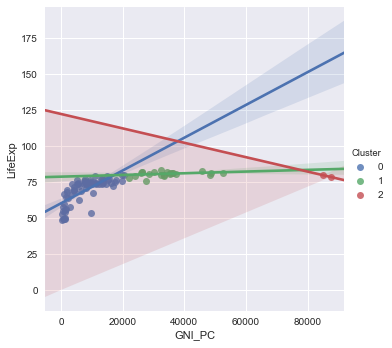

In [21]:
sns.lmplot(x="GNI_PC", y="LifeExp", hue="Cluster", data=undata_df)

We can enhance the plot by create an lmplot object and in turn calling its methods. Below a g lmplot object is created and then the set_axis_labels method is called (which creates acis labels).

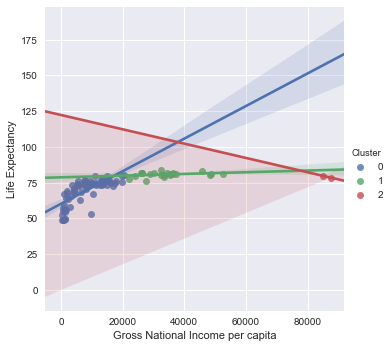

In [22]:
g = sns.lmplot(x="GNI_PC", y="LifeExp", hue="Cluster", data=undata_df)
g.set_axis_labels("Gross National Income per capita", "Life Expectancy")

Still another way to represent the categories is multiple graphs (placing graphs in different columns)

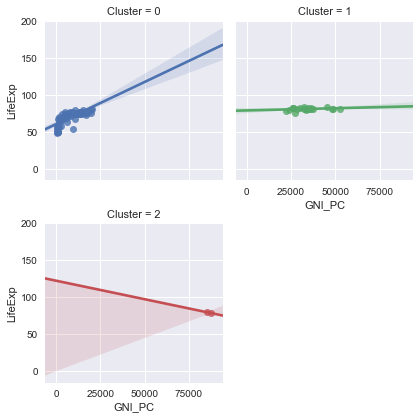

In [23]:
sns.lmplot(x="GNI_PC", y="LifeExp", hue="Cluster", col="Cluster", data=undata_df,
           col_wrap=2, size=3)

In ggplot we create a generic ggplot object and then manipulate it through the addition of geoms. In Seaborn each plot has its own command. To call a density plot, we will use the kdeplot command. The first plot is a pdf, the second a cdf, of life expectancy.

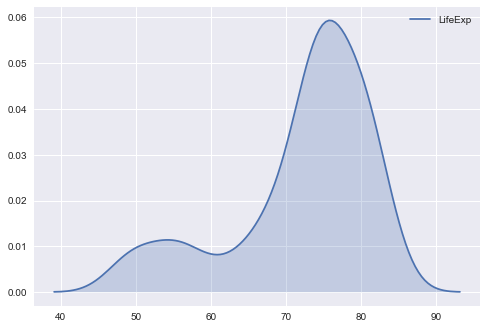

In [24]:
sns.kdeplot(undata_df.LifeExp, shade=True) # kernel density plot; Note: the warning message concerns numpy and is outside our control

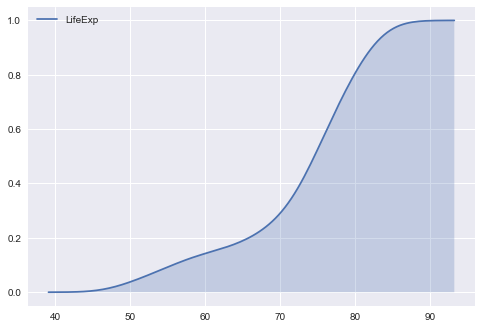

In [25]:
sns.kdeplot(undata_df.LifeExp, cumulative=True, shade=True) # kernel density plot

kdeplot can also produce a bivariate density diagram.

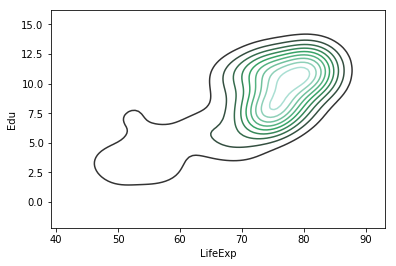

In [30]:
sns.kdeplot(data=undata_df.LifeExp, data2=undata_df.Edu) # kernel density plot; Note: the warning message concerns numpy and is outside our control

Other distribution commands include distplot and boxplot.

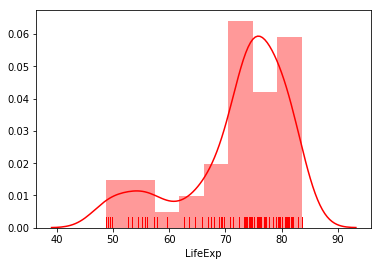

In [31]:
sns.distplot(undata_df.LifeExp, rug=True, color='red') # rug includes marks along the x-axis 

We can set other plot parameters indepedently of the plot specific attributes (similar to themes in ggplot). 

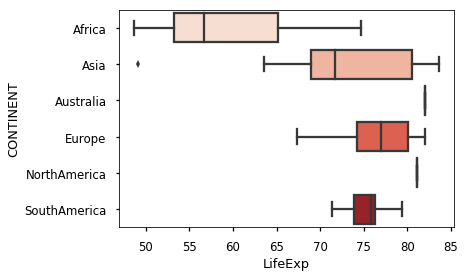

In [32]:
sns.set_context("talk", font_scale=.9) # context = {paper, notebook, talk, poster}
sns.set_palette("Reds")
sns.boxplot(undata_df.LifeExp, y=undata_df.CONTINENT)

There are some Seaborn-specific versions of plots with specific commands, such as the joint plot that shows the data distributions outside the axes 

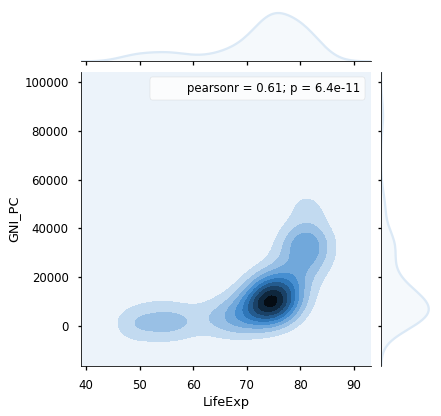

In [33]:
#sns.jointplot(x="x", y="y", data=df)
sns.set_palette("Blues")
sns.jointplot(x="LifeExp", y="GNI_PC", kind="kde", data=undata_df)

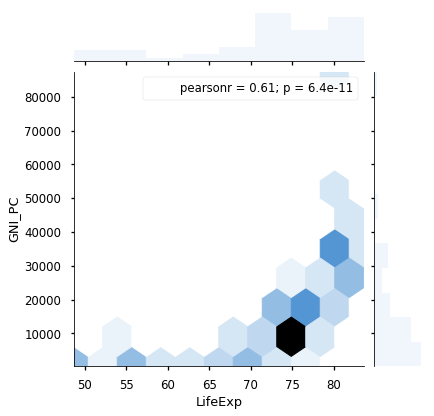

In [34]:
sns.jointplot(x="LifeExp", y="GNI_PC", kind="hex", data=undata_df)

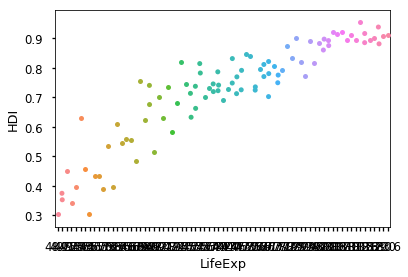

In [35]:
sns.stripplot(x="LifeExp", y="HDI", data=undata_df, jitter=True)

We can combine plots where it makes sense; for instance, by using density and histogram plots together. 

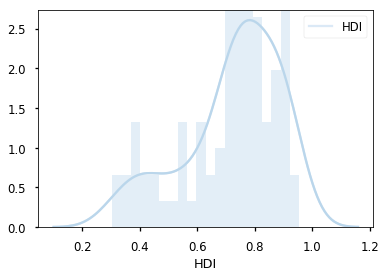

In [28]:
sns.kdeplot(undata_df.HDI)
sns.distplot(undata_df.HDI, bins=20)

## ggplot

Inspired by Hadley Wickham's ggplot2, Python programmers created their own version of ggplot. The syntax is very similar and ggplot does allow references to panda dataframes. Note that some ggplot complications may be attributable to its use in a notebook. The ggplot module is not included with the Anaconda download, so it must be downloaded separately via the command line (as administrator) using:
conda install -c conda-forge ggplot

In [12]:
install ggplot

from ggplot import * # https://pypi.python.org/pypi/ggplot
import matplotlib as mpl

ModuleNotFoundError: No module named 'ggplot'

The following scatterplot is built from two aesthetics (x and y) mapped to education (Edu) and HDI using the geom_point geom. Note that the syntax is not identical, for instance neither leaving the ggplot object null and declaring data at the layer level nor the parameter inherit.aes = 'FALSE' worked as it does in R

C:\Users\orang\Anaconda3\lib\site-packages\ggplot\stats\stat_smooth.py:77: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  smoothed_data = smoothed_data.sort('x')


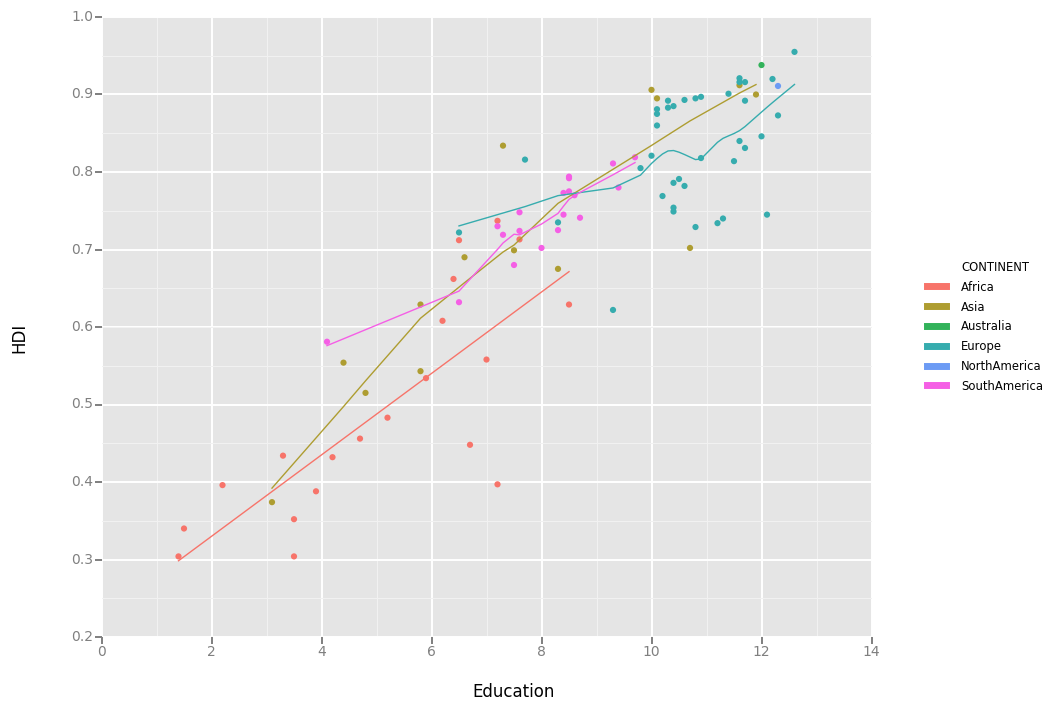

<ggplot: (-9223371888162244885)>

In [34]:
ggplot(undata_df, aes(x = 'Edu', y = 'HDI', color = 'CONTINENT')) +\
  geom_point() + xlab("Education") +\
    stat_smooth(undata_df, aes(x = 'Edu', y = 'HDI'), se='FALSE') 

Consistent with the R version, ggplot functions result in graph objects that can be manipulated and extended. The next command creates a ggplot object (named 'p') and then extends the object via a geom layer.

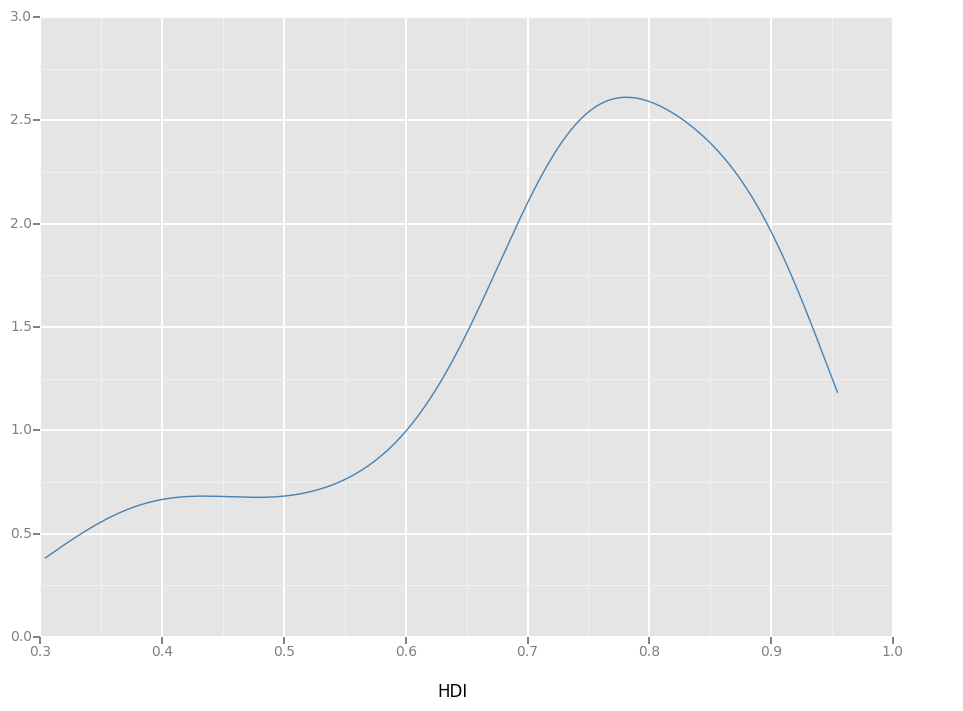

<ggplot: (-9223371888161415778)>

In [36]:
p = ggplot(undata_df, aes(x='HDI'))
p + geom_density(color='steelblue')

Other ggplot featuers, such as facets, are also available.

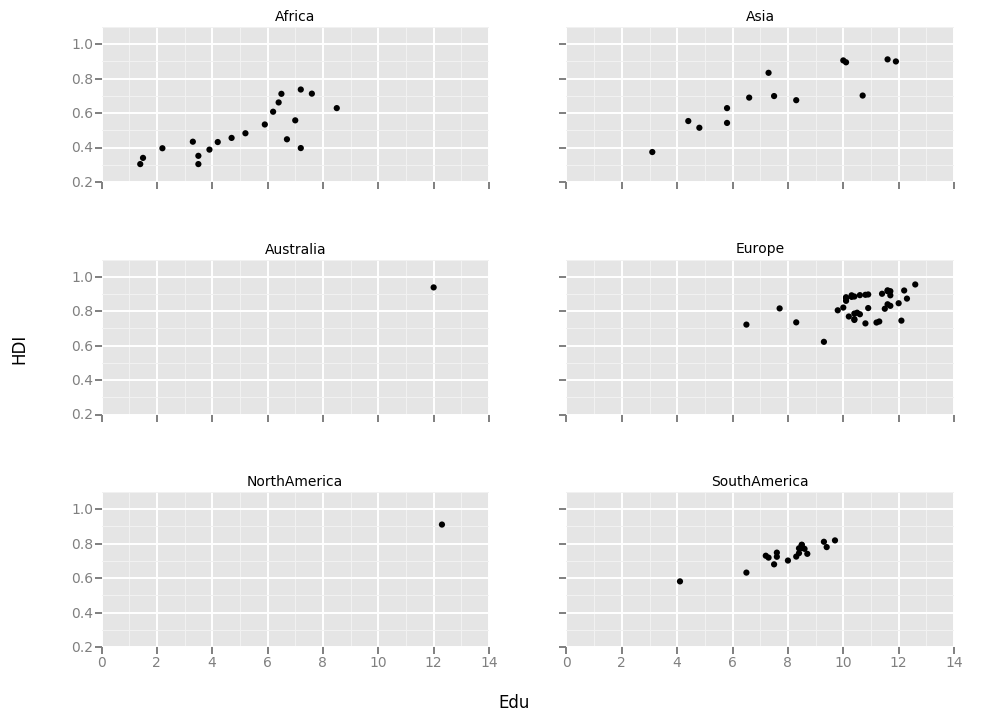

<ggplot: (-9223371888161214930)>

In [37]:
ggplot(undata_df, aes(x = 'Edu', y = 'HDI')) +\
   geom_point() +\
    facet_wrap('CONTINENT')